Variance score of rbf: 0.4660645339769517
Mean Squared Error of test data for rbf:  6.04177642887
Mean Squared Error of train data for rbf:  0.00912540948396
Real new dose :  [  4.  10.   8.   5.   2.   2.  14.   6.   6.   5.  12.   4.   8.   8.   4.]
Predicted new dose using rbf:  [ 6.76701729  8.90919624  7.18987233  5.68176768  6.76701723  3.88906529
  7.16080503  6.36245091  6.34004349  6.57432388  9.94382305  4.53849817
  8.39496011  7.62319986  4.22444259]


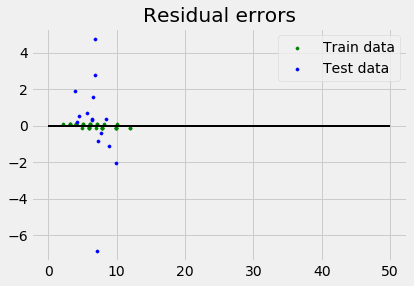

In [1]:
import matplotlib.pyplot as plt 
import numpy as np 
from sklearn.svm import SVR
from sklearn import datasets, metrics
import csv
from copy import deepcopy

def load_csv(filename):
    raw_data = open(filename, 'rt')
    reader = csv.reader(raw_data, delimiter=',', quoting=csv.QUOTE_NONE)
    x = list(reader)
    data = np.array(x).astype('float')
    return data
    
def splitDataset(dataset, splitratio):
    trainsize = int(np.round(dataset.shape[0]*splitratio))
    trainset = np.zeros((trainsize,dataset.shape[1]))#array to store the training set.
    testset = deepcopy(dataset)#create a copy of the dataset in test set.
    for numsamples in range(trainsize):
        indx = np.random.randint(0,testset.shape[0])#random index generation
        trainset[numsamples,:] = testset[indx,:]#adding the randomly selected data vector to the training set
        testset = np.delete(testset, indx, axis = 0)#delete the selected observation from the test set.
    return trainset,testset

data = load_csv('preprocessed_data.csv')
trainset, testset = splitDataset(data,0.7)

x_train = trainset[:,:-1]
y_train = trainset[:,-1]

x_test = testset[:,:-1]
y_test = testset[:,-1]
  
# create linear regression object 
reg = SVR(kernel='rbf', C=1e3, gamma=0.1)
  
# train the model using the training sets 
reg.fit(x_train, y_train)

# variance score: 1 means perfect prediction 
print('Variance score of rbf: {}'.format(reg.score(x_test, y_test)))

# mean squared error
print('Mean Squared Error of test data for rbf: ', metrics.mean_squared_error(y_test, reg.predict(x_test)))
print('Mean Squared Error of train data for rbf: ', metrics.mean_squared_error(y_train, reg.predict(x_train)))

# real and predicted new dose
print('Real new dose : ', y_test)
print('Predicted new dose using rbf: ', reg.predict(x_test))

# plot for residual error of rbf
  
## setting plot style 
plt.style.use('fivethirtyeight') 
  
## plotting residual errors in training data 
plt.scatter(reg.predict(x_train), reg.predict(x_train) - y_train, 
            color = "green", s = 10, label = 'Train data') 
  
## plotting residual errors in test data 
plt.scatter(reg.predict(x_test), reg.predict(x_test) - y_test, 
            color = "blue", s = 10, label = 'Test data') 
  
## plotting line for zero residual error 
plt.hlines(y = 0, xmin = 0, xmax = 50, linewidth = 2) 
  
## plotting legend 
plt.legend(loc = 'upper right') 
  
## plot title 
plt.title("Residual errors") 
  
## function to show plot 
plt.show()
